In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
df=pd.read_csv('survey lung cancer.csv')

In [3]:
df
df.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC DISEASE', 'FATIGUE ', 'ALLERGY ', 'WHEEZING',
       'ALCOHOL CONSUMING', 'COUGHING', 'SHORTNESS OF BREATH',
       'SWALLOWING DIFFICULTY', 'CHEST PAIN', 'LUNG_CANCER'],
      dtype='object')

In [4]:
df.info()

df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

,count,mean,std,min,25%,50%,75%,max
AGE,309.0,62.673139,8.210301,21.0,57.0,62.0,69.0,87.0
SMOKING,309.0,1.563107,0.496806,1.0,1.0,2.0,2.0,2.0
YELLOW_FINGERS,309.0,1.569579,0.495938,1.0,1.0,2.0,2.0,2.0
ANXIETY,309.0,1.498382,0.500808,1.0,1.0,1.0,2.0,2.0
PEER_PRESSURE,309.0,1.501618,0.500808,1.0,1.0,2.0,2.0,2.0
CHRONIC DISEASE,309.0,1.504854,0.500787,1.0,1.0,2.0,2.0,2.0
FATIGUE,309.0,1.673139,0.469827,1.0,1.0,2.0,2.0,2.0
ALLERGY,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0
WHEEZING,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0
ALCOHOL CONSUMING,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0


In [5]:
for col in df.columns:
    print(f"Unique values in column '{col}': {df[col].unique()}")

Unique values in column 'GENDER': ['M' 'F']
Unique values in column 'AGE': [69 74 59 63 75 52 51 68 53 61 72 60 58 48 57 44 64 21 65 55 62 56 67 77
 70 54 49 73 47 71 66 76 78 81 79 38 39 87 46]
Unique values in column 'SMOKING': [1 2]
Unique values in column 'YELLOW_FINGERS': [2 1]
Unique values in column 'ANXIETY': [2 1]
Unique values in column 'PEER_PRESSURE': [1 2]
Unique values in column 'CHRONIC DISEASE': [1 2]
Unique values in column 'FATIGUE ': [2 1]
Unique values in column 'ALLERGY ': [1 2]
Unique values in column 'WHEEZING': [2 1]
Unique values in column 'ALCOHOL CONSUMING': [2 1]
Unique values in column 'COUGHING': [2 1]
Unique values in column 'SHORTNESS OF BREATH': [2 1]
Unique values in column 'SWALLOWING DIFFICULTY': [2 1]
Unique values in column 'CHEST PAIN': [2 1]
Unique values in column 'LUNG_CANCER': ['YES' 'NO']


In [6]:
df['GENDER'] = df['GENDER'].replace({'M': 1, 'F': 0})
df['LUNG_CANCER'] = df['LUNG_CANCER'].replace({'YES': 1, 'NO': 0})

df.rename(columns={'CHRONIC DISEASE': 'CHRONIC_DISEASE'}, inplace=True)
df.rename(columns={'ALCOHOL CONSUMING': 'ALCOHOL_CONSUMING'}, inplace=True)
df.rename(columns={'SHORTNESS OF BREATH': 'SHORTNESS_OF_BREATH'}, inplace=True)
df.rename(columns={'SWALLOWING DIFFICULTY': 'SWALLOWING_DIFFICULTY'}, inplace=True)
df.rename(columns={'CHEST PAIN': 'CHEST_PAIN'}, inplace=True)


                       LUNG_CANCER
GENDER                    0.067254
AGE                       0.089465
SMOKING                   0.058179
YELLOW_FINGERS            0.181339
ANXIETY                   0.144947
PEER_PRESSURE             0.186388
CHRONIC_DISEASE           0.110891
FATIGUE                   0.150673
ALLERGY                   0.327766
WHEEZING                  0.249300
ALCOHOL_CONSUMING         0.288533
COUGHING                  0.248570
SHORTNESS_OF_BREATH       0.060738
SWALLOWING_DIFFICULTY     0.259730
CHEST_PAIN                0.190451
LUNG_CANCER               1.000000


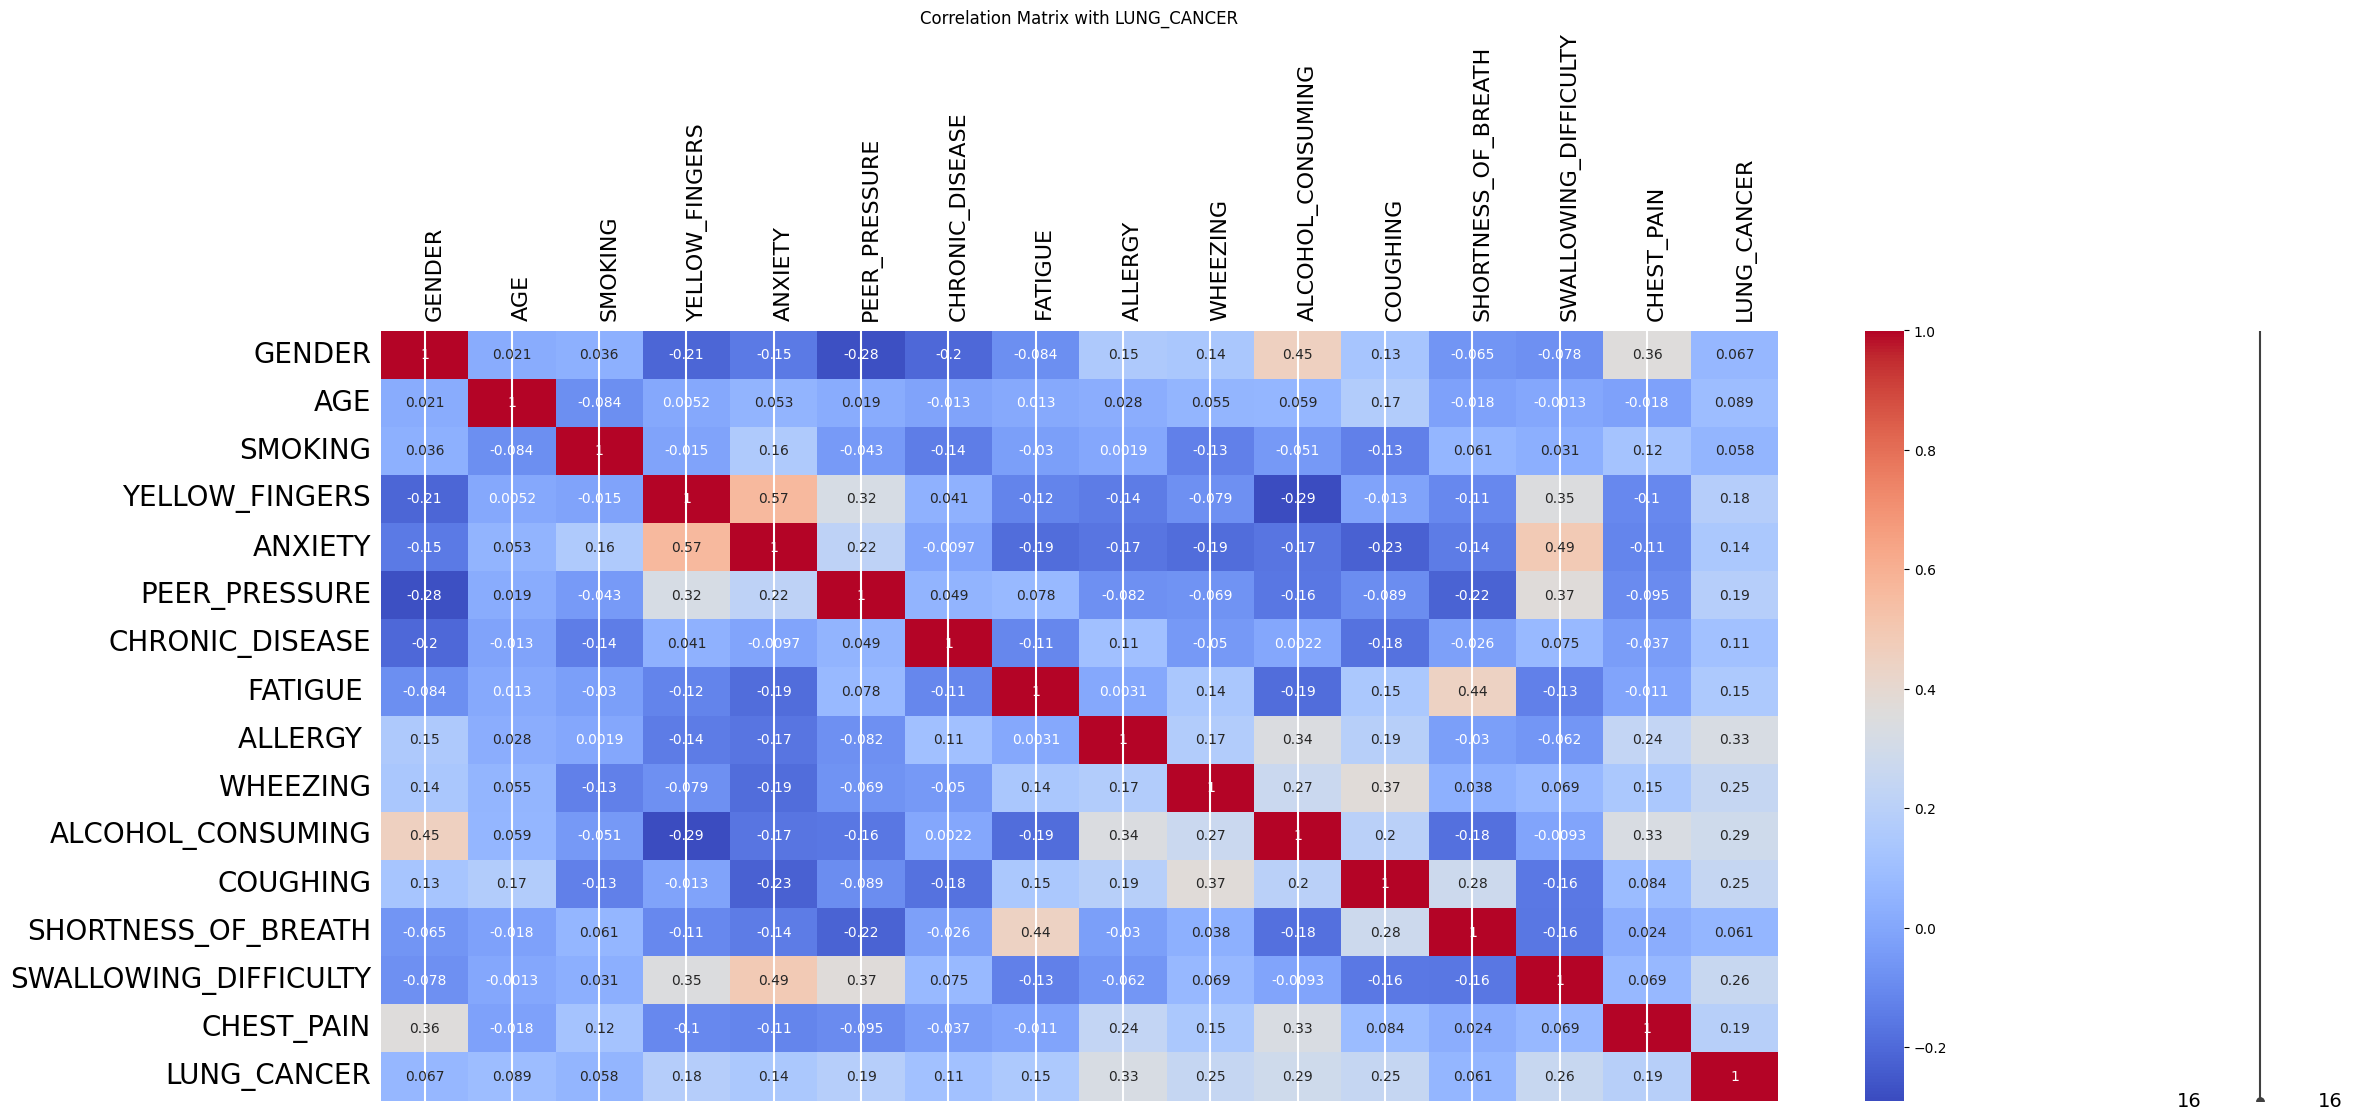

In [8]:
msno.matrix(df)

chosen_column = "LUNG_CANCER" 

# for col in df.columns:
#     if col != chosen_column:
#         plt.scatter(df[chosen_column], df[col])
#         plt.xlabel(chosen_column)
#         plt.ylabel(col)
#         plt.title(f"Scatter Plot of {col} vs. {chosen_column}")
#         plt.show()

corr_matrix = df.corr(method='pearson')

# display the correlations between each column and the chosen column
print(corr_matrix[[chosen_column]])   #The values range from -1 to 1, with values close to -1 indicating a strong negative correlation, values close to 1 indicating a strong positive correlation, and values close to 0 indicating little to no correlation. 

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title(f"Correlation Matrix with {chosen_column}")
plt.show()  #The color scale indicates the strength of the correlation, with red indicating a positive correlation and blue indicating a negative correlation. The darker the color, the stronger the correlation. The diagonal line in the heatmap represents the correlation of each variable with itself, which is always 1.

In [9]:
### Independent and Dependent features
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

temp = X.iloc[:, :7]
tmep2 = X.iloc[:, 9:]
X  =pd.concat([temp, tmep2], axis=1)

In [10]:
X

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC_DISEASE,WHEEZING,ALCOHOL_CONSUMING,COUGHING,SHORTNESS_OF_BREATH,SWALLOWING_DIFFICULTY,CHEST_PAIN
0,1,69,1,2,2,1,1,2,2,2,2,2,2
1,1,74,2,1,1,1,2,1,1,1,2,2,2
2,0,59,1,1,1,2,1,2,1,2,2,1,2
3,1,63,2,2,2,1,1,1,2,1,1,2,2
4,0,63,1,2,1,1,1,2,1,2,2,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,0,56,1,1,1,2,2,1,2,2,2,2,1
305,1,70,2,1,1,1,1,2,2,2,2,1,2
306,1,58,2,1,1,1,1,2,2,2,1,1,2
307,1,67,2,1,2,1,1,1,2,2,2,1,2


In [11]:
X.columns

Index(['GENDER', 'AGE', 'SMOKING', 'YELLOW_FINGERS', 'ANXIETY',
       'PEER_PRESSURE', 'CHRONIC_DISEASE', 'WHEEZING', 'ALCOHOL_CONSUMING',
       'COUGHING', 'SHORTNESS_OF_BREATH', 'SWALLOWING_DIFFICULTY',
       'CHEST_PAIN'],
      dtype='object')

In [12]:
y.head(20)

0     1
1     1
2     0
3     0
4     0
5     1
6     1
7     1
8     0
9     1
10    1
11    1
12    0
13    1
14    0
15    1
16    1
17    1
18    1
19    0
Name: LUNG_CANCER, dtype: int64

In [13]:
### Train Test Split
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [15]:
### Implement Random Forest classifier
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(X_train,y_train)

RandomForestClassifier()

In [16]:
# Logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state = 42)
logreg.fit(X_train, y_train)

C:\Users\Meet Patel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=42)

In [17]:
# K nearest neighbors Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 24, metric = 'minkowski', p = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=24)

In [18]:
# Support Vector Classifier Algorithm
from sklearn.svm import SVC
svc = SVC(kernel = 'linear', random_state = 42)
svc.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [19]:
# Naive Bayes Algorithm
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train)

GaussianNB()

In [20]:
# Decision tree Algorithm
from sklearn.tree import DecisionTreeClassifier
dectree = DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dectree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [21]:
# Making predictions on test dataset
Y_pred_logreg = logreg.predict(X_test)
Y_pred_knn = knn.predict(X_test)
Y_pred_svc = svc.predict(X_test)
Y_pred_nb = nb.predict(X_test)
Y_pred_dectree = dectree.predict(X_test)
Y_pred_ranfor = classifier.predict(X_test)

In [22]:
# Evaluating using accuracy_score metric
from sklearn.metrics import accuracy_score
accuracy_logreg = accuracy_score(y_test, Y_pred_logreg)
accuracy_knn = accuracy_score(y_test, Y_pred_knn)
accuracy_svc = accuracy_score(y_test, Y_pred_svc)
accuracy_nb = accuracy_score(y_test, Y_pred_nb)
accuracy_dectree = accuracy_score(y_test, Y_pred_dectree)
accuracy_ranfor = accuracy_score(y_test, Y_pred_ranfor)

In [23]:
### Check Accuracy
from sklearn.metrics import accuracy_score
# Accuracy on test set
print("Logistic Regression: " + str(accuracy_logreg * 100))
print("K Nearest neighbors: " + str(accuracy_knn * 100))
print("Support Vector Classifier: " + str(accuracy_svc * 100))
print("Naive Bayes: " + str(accuracy_nb * 100))
print("Decision tree: " + str(accuracy_dectree * 100))
print("Random Forest: " + str(accuracy_ranfor * 100))

Logistic Regression: 89.24731182795699
K Nearest neighbors: 83.87096774193549
Support Vector Classifier: 87.09677419354838
Naive Bayes: 83.87096774193549
Decision tree: 92.47311827956989
Random Forest: 88.17204301075269


In [24]:
### Create a Pickle file using serialization 
import pickle
pickle_out = open("survey_lung_cancer.pkl","wb")
pickle.dump(dectree, pickle_out)
pickle_out.close()